# 1.a: Data Cleaning

Import of necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import of the Dataset

In [ ]:
# Dataset columns
columns = ["age", "workclass", "fnlwgt", "education", "education_num", 
           "marital_status", "occupation", "relationship", "race", 
           "sex", "capital_gain", "capital_loss", "hours_per_week", 
           "native_country", "income"]

df_train_path = "adult/adult.data"
df_test_path = "adult/adult.test"

# Load data with pandas, define column names, recognize " ?" as NaN and ignore spaces at the beginning of columns
df_train = pd.read_csv(df_train_path, header=None, names=columns, na_values="?", skipinitialspace=True)
df_test = pd.read_csv(df_test_path, header=None, names=columns, na_values="?", skipinitialspace=True)

In [3]:
df_train.shape

(32561, 15)

In [4]:
df_test.shape

(16282, 15)

General information about the dataset

In [5]:
df_test.iloc[0]

age               |1x3 Cross validator
workclass                          NaN
fnlwgt                             NaN
education                          NaN
education_num                      NaN
marital_status                     NaN
occupation                         NaN
relationship                       NaN
race                               NaN
sex                                NaN
capital_gain                       NaN
capital_loss                       NaN
hours_per_week                     NaN
native_country                     NaN
income                             NaN
Name: 0, dtype: object

In [ ]:
df_test.drop(0, inplace=True) # Remove the first row that does not contain data

In [7]:
df_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


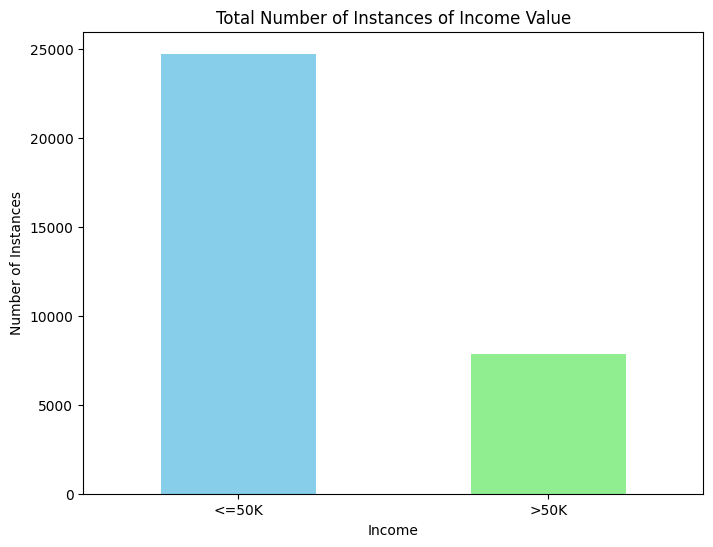

In [ ]:
income_counts = df_train['income'].value_counts()

# Plot the number of occurrences of income values
plt.figure(figsize=(8, 6))
income_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Total Number of Instances of Income Value')
plt.xlabel('Income')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

Handling missing values

In [ ]:
# Check missing values
print(df_train.isnull().sum())
print(df_test.isnull().sum())

# Calculate percentage of missing values
missing_percentage_train = df_train.isnull().mean() * 100
missing_percentage_test = df_test.isnull().mean() * 100
print(missing_percentage_train)
print(missing_percentage_test)


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64
age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64
age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
ca

In [ ]:
# For df_train
df_train["workclass"] = df_train["workclass"].fillna('Unknown')
df_train["occupation"] = df_train["occupation"].fillna('Unknown')
df_train = df_train.dropna(subset=['native_country'])

# For df_test
df_test["workclass"] = df_test["workclass"].fillna('Unknown')
df_test["occupation"] = df_test["occupation"].fillna('Unknown')
df_test = df_test.dropna(subset=['native_country'])


In [12]:
df_train.shape

(31978, 15)

# Handling inconsistencies

In [13]:
df_train.capital_gain.value_counts(dropna=False).head(10)

capital_gain
0        29320
15024      341
7688       275
7298       242
99999      152
3103        97
5178        95
5013        69
4386        68
8614        55
Name: count, dtype: int64

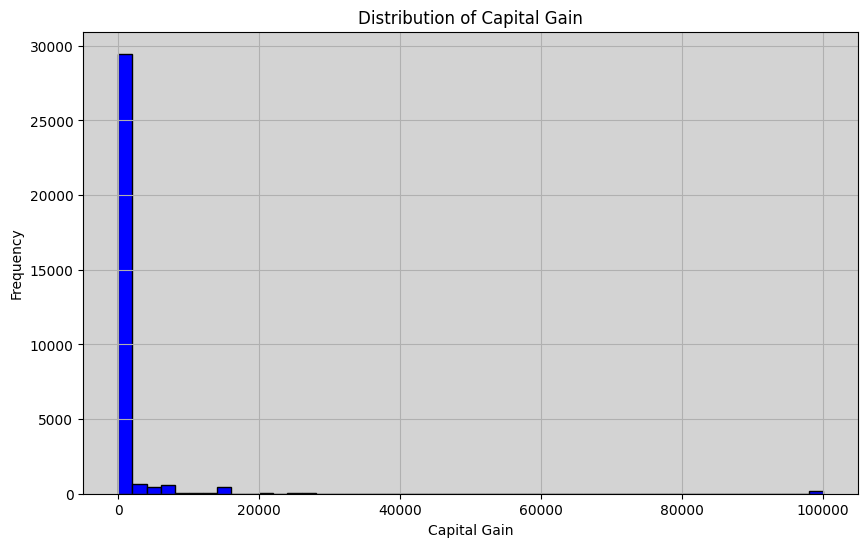

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['capital_gain'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)
ax = plt.gca()
ax.set_facecolor("lightgrey")
plt.show()

In [ ]:
# Useless categories. Removing them might create duplicate rows
df_test.drop("fnlwgt", axis=1, inplace=True)
df_train.drop("fnlwgt", axis=1, inplace=True)
df_train.drop("education", axis=1, inplace=True)
df_test.drop("education", axis=1, inplace=True)

In [ ]:
# Remove duplicate rows only from df_train
n_samples_before = df_train.shape[0]
df_train.drop_duplicates(inplace=True)
n_samples_after = df_train.shape[0]

print(n_samples_before)
print(n_samples_after)
print("Duplicates removed: {:.2%}".format((n_samples_before - n_samples_after) / n_samples_before))

31978
28516
Duplicates removed: 10.83%


In [17]:
df_test.income.value_counts(dropna=False)

income
<=50K.    12235
>50K.      3772
Name: count, dtype: int64

In [18]:
df_train.income.value_counts(dropna=False)

income
<=50K    21451
>50K      7065
Name: count, dtype: int64

In [19]:
df_train['income'] = df_train.income.str.rstrip('.').astype('category')
df_test['income'] = df_test.income.str.rstrip('.').astype('category')

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16007 entries, 1 to 16281
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16007 non-null  object  
 1   workclass       16007 non-null  object  
 2   education_num   16007 non-null  float64 
 3   marital_status  16007 non-null  object  
 4   occupation      16007 non-null  object  
 5   relationship    16007 non-null  object  
 6   race            16007 non-null  object  
 7   sex             16007 non-null  object  
 8   capital_gain    16007 non-null  float64 
 9   capital_loss    16007 non-null  float64 
 10  hours_per_week  16007 non-null  float64 
 11  native_country  16007 non-null  object  
 12  income          16007 non-null  category
dtypes: category(1), float64(4), object(8)
memory usage: 1.6+ MB


In [ ]:
# Convert the "age" column of test set to numeric value
df_test['age'] = pd.to_numeric(df_test['age'])

In [22]:
df_train.shape

(28516, 13)

In [ ]:
# Remove invalid rows based on constraints on hours per week, age and capital gain
df_train = df_train[(df_train['hours_per_week'] <= 120) & (df_train['hours_per_week'] >= 0)]  # Valid working hours per week
df_train = df_train[(df_train['age'] <= 100) & (df_train['age'] >= 10)]  # Valid age range
df_train = df_train[df_train['capital_gain'] >= 0]  # Valid capital gain
df_train = df_train[df_train['capital_loss'] >= 0]  # Valid capital loss

# Reset correct row numbering
df_train.reset_index(drop=True, inplace=True)

# Let's see if there was any value that falls outside the limits
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28516 entries, 0 to 28515
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             28516 non-null  int64   
 1   workclass       28516 non-null  object  
 2   education_num   28516 non-null  int64   
 3   marital_status  28516 non-null  object  
 4   occupation      28516 non-null  object  
 5   relationship    28516 non-null  object  
 6   race            28516 non-null  object  
 7   sex             28516 non-null  object  
 8   capital_gain    28516 non-null  int64   
 9   capital_loss    28516 non-null  int64   
 10  hours_per_week  28516 non-null  int64   
 11  native_country  28516 non-null  object  
 12  income          28516 non-null  category
dtypes: category(1), int64(5), object(7)
memory usage: 2.6+ MB


Encoding

In [ ]:
# Create copies of original datasets
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [ ]:
income_mapping = {
    "<=50K": 0,
    ">50K": 1
}
df_train["income"] = df_train["income"].map(income_mapping).astype(int) # Convert "income" column to numeric value
df_test["income"] = df_test["income"].map(income_mapping).astype(int)

# Columns for One-Hot Encoding
one_hot_cols = ["workclass", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]

# One-Hot Encoding for the remaining columns
df_train = pd.get_dummies(df_train, columns=one_hot_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=one_hot_cols, drop_first=True)

In [26]:
df_train.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


# 1.β

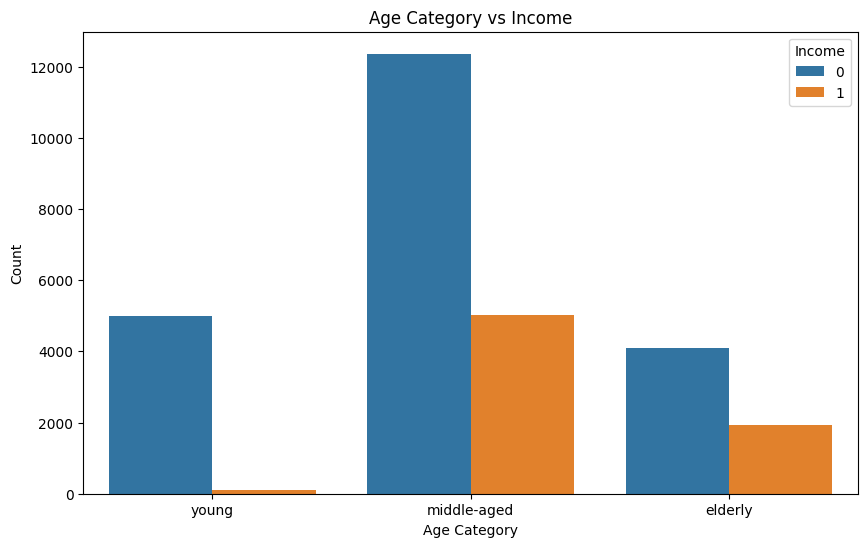

In [ ]:
# Create bins and labels for age categorization
bins = [0, 25, 50, 100]
labels = ["young", "middle-aged", "elderly"]
df_train["age_category"] = pd.cut(df_train["age"], bins=bins, labels=labels)
df_test["age_category"] = pd.cut(df_test["age"], bins=bins, labels=labels)

# Visualization of the relationship between age_category and income
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x="age_category", hue="income")
plt.title("Age Category vs Income")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.legend(title="Income")
plt.show()

In [28]:
hours_per_week_counts = df_train.hours_per_week.value_counts().sort_index(ascending=False)
hours_per_week_counts

hours_per_week
99    83
98    11
97     2
96     5
95     2
      ..
5     57
4     53
3     38
2     32
1     18
Name: count, Length: 94, dtype: int64

In [29]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
df_train['hours_per_week_bins'] = pd.cut(df_train['hours_per_week'], bins=bins, labels=labels, right=False)
df_test['hours_per_week_bins'] = pd.cut(df_test['hours_per_week'], bins=bins, labels=labels, right=False)

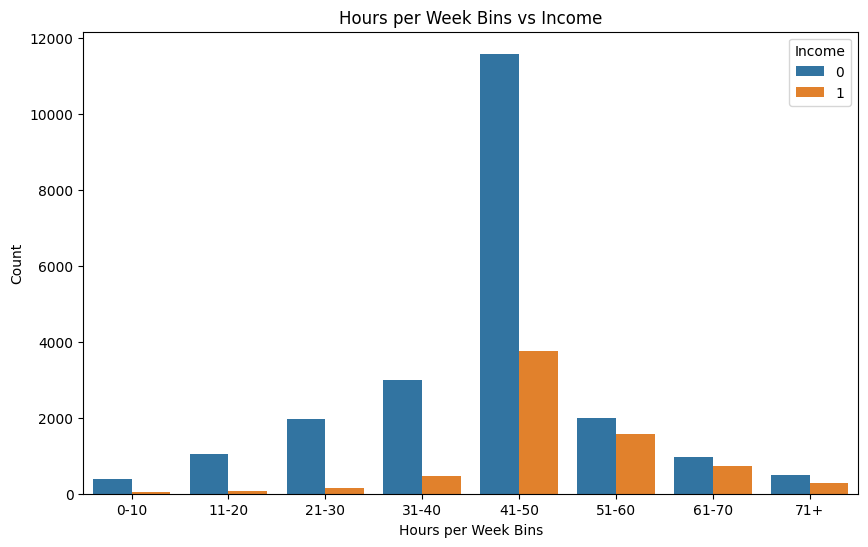

In [ ]:
# Visualization of the relationship between hours_per_week_bins and income
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='hours_per_week_bins', hue='income')
plt.title('Hours per Week Bins vs Income')
plt.xlabel('Hours per Week Bins')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [ ]:
# Mapping for age_category
age_category_mapping = {
    "young": 0,
    "middle-aged": 1,
    "elderly": 2
}
df_train["age_category"] = df_train["age_category"].map(age_category_mapping).astype(int)
df_test["age_category"] = df_test["age_category"].map(age_category_mapping).astype(int)

# Mapping for hours_per_week_bins
hours_per_week_bins_mapping = {
    '0-10': 0,
    '11-20': 1,
    '21-30': 2,
    '31-40': 3,
    '41-50': 4,
    '51-60': 5,
    '61-70': 6,
    '71+': 7
}
df_train["hours_per_week_bins"] = df_train["hours_per_week_bins"].map(hours_per_week_bins_mapping).astype(int)
df_test["hours_per_week_bins"] = df_test["hours_per_week_bins"].map(hours_per_week_bins_mapping).astype(int)

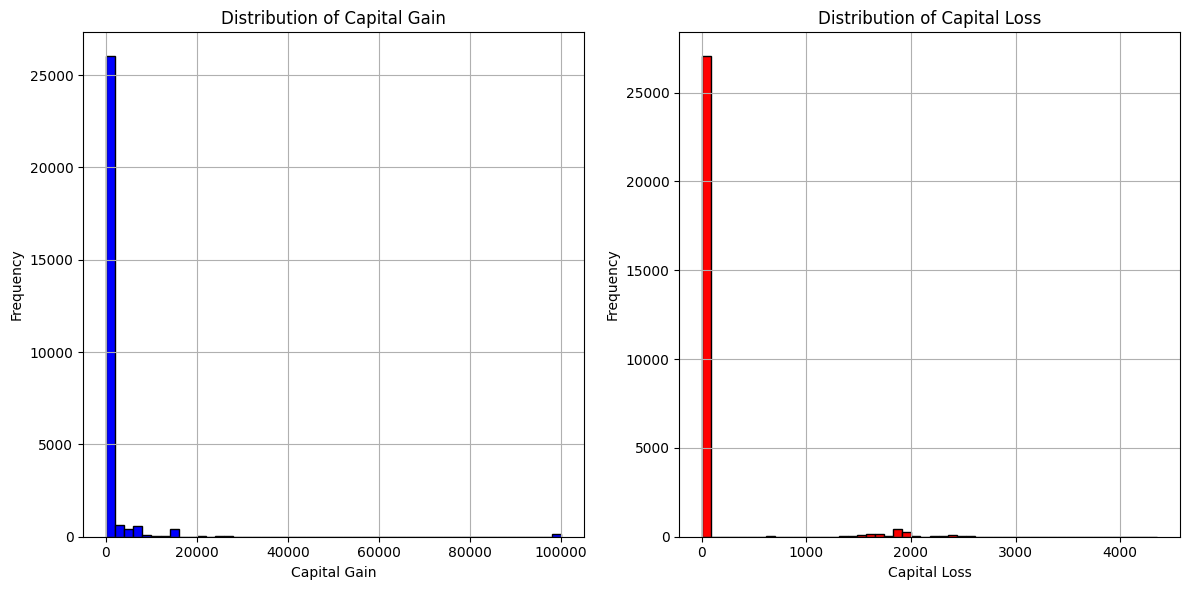

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for capital_gain
plt.subplot(1, 2, 1)
plt.hist(df_train['capital_gain'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for capital_loss
plt.subplot(1, 2, 2)
plt.hist(df_train['capital_loss'], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Apply logarithmic transformation
df_train['capital_gain_log'] = np.log1p(df_train['capital_gain']) # Add 1 to avoid log(0)
df_train['capital_loss_log'] = np.log1p(df_train['capital_loss'])
df_test['capital_gain_log'] = np.log1p(df_test['capital_gain'])
df_test['capital_loss_log'] = np.log1p(df_test['capital_loss'])

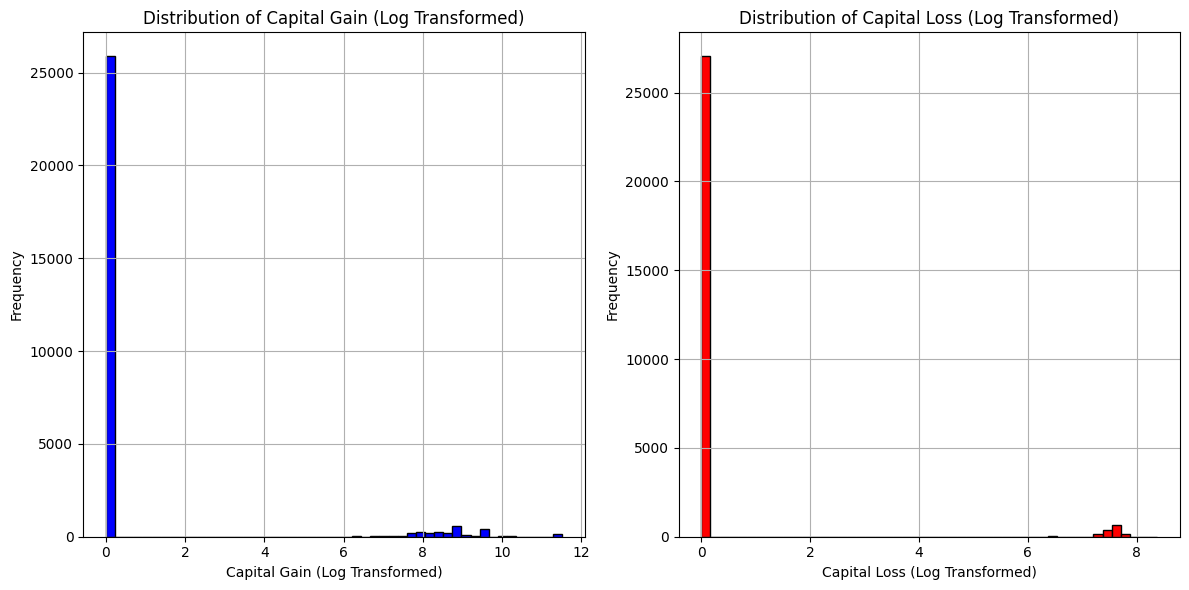

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram for capital_gain_log
plt.subplot(1, 2, 1)
plt.hist(df_train['capital_gain_log'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Capital Gain (Log Transformed)')
plt.xlabel('Capital Gain (Log Transformed)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for capital_loss_log
plt.subplot(1, 2, 2)
plt.hist(df_train['capital_loss_log'], bins=50, color='red', edgecolor='black')
plt.title('Distribution of Capital Loss (Log Transformed)')
plt.xlabel('Capital Loss (Log Transformed)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric features for normalization
numeric_features = ["age", "capital_gain_log", "capital_loss_log", "hours_per_week", "capital_gain", "capital_loss"]
scaler = MinMaxScaler()

# Normalization
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])

In [36]:
df_train[numeric_features].head()

,age,capital_gain_log,capital_loss_log,hours_per_week,capital_gain,capital_loss
0,0.301370,0.667492,0.0,0.397959,0.02174,0.0
1,0.452055,0.000000,0.0,0.122449,0.00000,0.0
2,0.287671,0.000000,0.0,0.397959,0.00000,0.0
3,0.493151,0.000000,0.0,0.397959,0.00000,0.0
4,0.150685,0.000000,0.0,0.397959,0.00000,0.0


# 1.γ

In [37]:
from sklearn.decomposition import PCA

In [38]:
y = df_train_original['income']
X = df_train_original.drop(columns=['income'])

In [39]:
X.shape

(28516, 12)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Create copies of the data for PCA analysis
X_pca_copy = X.copy()
y_pca_copy = y.copy()

# Identify categorical variables
categorical_columns = X_pca_copy.select_dtypes(exclude=[np.number]).columns

# Create LabelEncoder object for encoding categorical variables
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical variable
for column in categorical_columns:
    X_pca_copy[column] = label_encoder.fit_transform(X_pca_copy[column])

# Normalize numerical features before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_copy.select_dtypes(include=[np.number]))

# Apply PCA for dimensionality reduction while maintaining 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check the number of components selected
print(f"Number of selected principal components: {X_pca.shape[1]}")

# Print the total variance retained
print(f"Ratio of retained variance: {sum(pca.explained_variance_ratio_)}")


Αριθμός επιλεγμένων κύριων συνιστωσών: 11
Αναλογία διατηρούμενης διακύμανσης: 0.9679730003646833


Random Sampling

In [ ]:
# 2. Sampling: Reduce data to 50%
sampled_data = df_train.sample(frac=0.5, random_state=42).reset_index(drop=True)

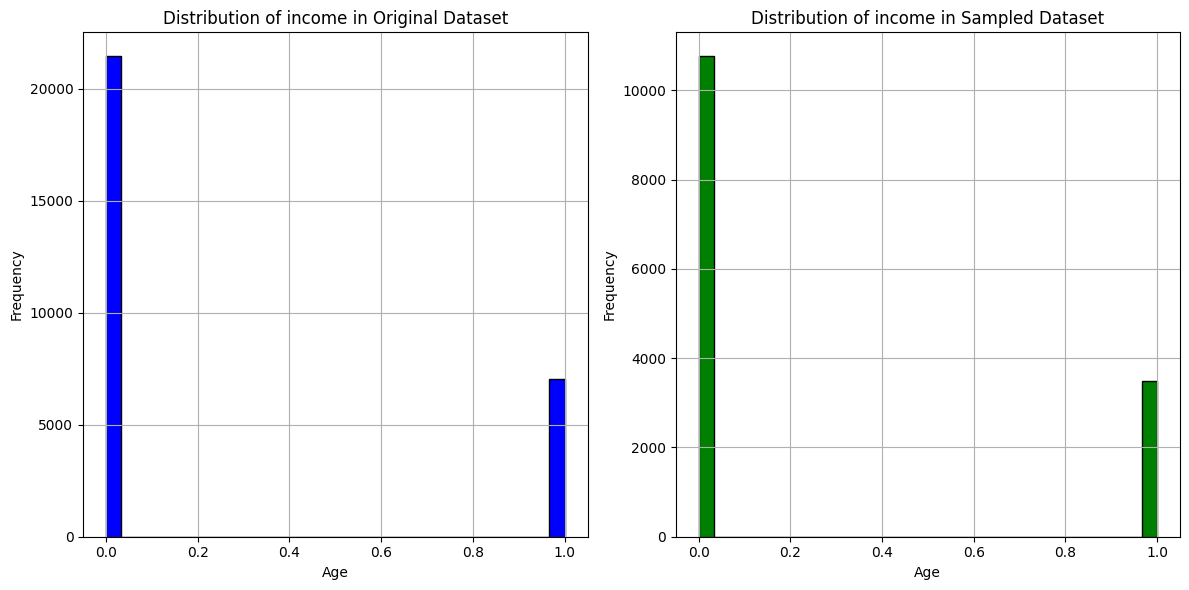

In [ ]:
plt.figure(figsize=(12, 6))

# Income distribution in the original dataset
plt.subplot(1, 2, 1)
plt.hist(df_train['income'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of income in Original Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Income distribution in the sampled dataset
plt.subplot(1, 2, 2)
plt.hist(sampled_data['income'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of income in Sampled Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [43]:
sampled_data.shape

(14258, 88)

Stratified sampling

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test set with stratification
stratified_sampled_data, _ = train_test_split(df_train, test_size=0.5, stratify=df_train['income'], random_state=42)

# Reset correct row numbering
stratified_sampled_data.reset_index(drop=True, inplace=True)

# Check the number of rows
stratified_sampled_data.shape

(14258, 88)

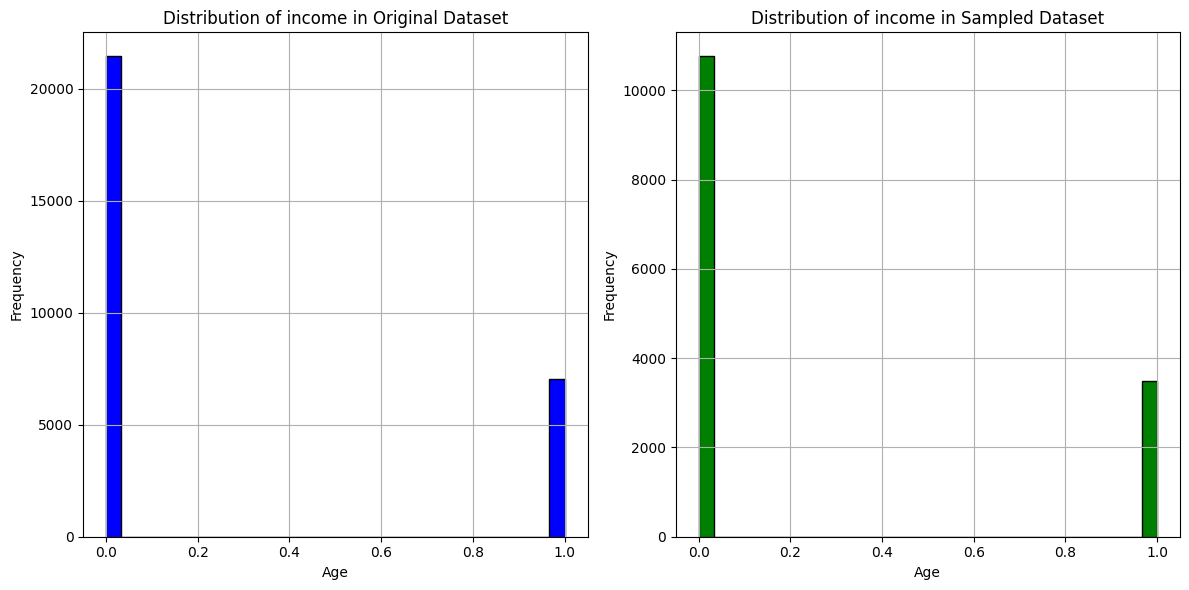

In [ ]:
plt.figure(figsize=(12, 6))

# Income distribution in the original dataset
plt.subplot(1, 2, 1)
plt.hist(df_train['income'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of income in Original Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Income distribution in the sampled dataset
plt.subplot(1, 2, 2)
plt.hist(sampled_data['income'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of income in Sampled Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# 2.α

Correlation Analysis

In [ ]:
# Target variable
y = df_train['income'].copy()

# Features
X = df_train.drop(columns=['income']).copy()

In [47]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_train_corr = df_train.copy()
# Calculate correlation matrix between features and target variable
correlation_matrix = df_train_corr.corr()
target_correlation = correlation_matrix['income'].sort_values(ascending=False)

print(target_correlation)

income                               1.000000
marital_status_Married-civ-spouse    0.445939
education_num                        0.332997
capital_gain_log                     0.296895
capital_gain                         0.230167
                                       ...   
relationship_Unmarried              -0.151085
occupation_Other-service            -0.158216
relationship_Not-in-family          -0.190867
relationship_Own-child              -0.217807
marital_status_Never-married        -0.306372
Name: income, Length: 88, dtype: float64


C:\Users\stath\AppData\Local\Temp\ipykernel_42184\2175567681.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


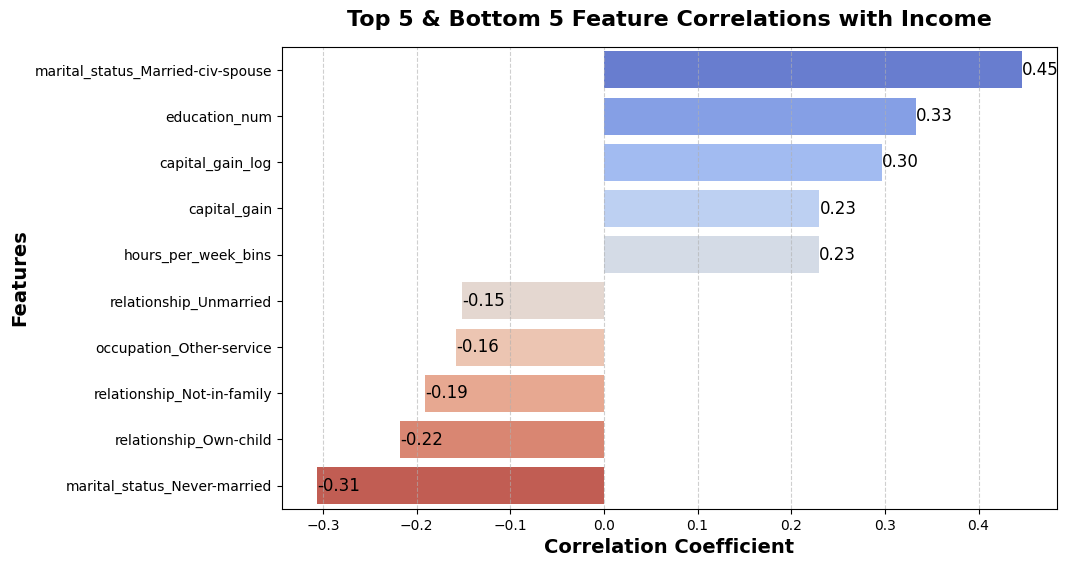

In [ ]:
# Remove 'income' from the feature list
correlation_income = target_correlation['income']
target_correlation = target_correlation.drop("income")

# Select the top 5 and bottom 5 features
top_5 = target_correlation.head(5)
bottom_5 = target_correlation.tail(5)

# Combine the two into a new series
selected_features = pd.concat([top_5, bottom_5])

plt.figure(figsize=(10, 6))

# Create the barplot
sns.barplot(
    x=selected_features.values, 
    y=selected_features.index, 
    palette='coolwarm'
)

plt.title('Top 5 & Bottom 5 Feature Correlations with Income', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Correlation Coefficient', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontsize=14, fontweight='bold')

# Display values on bars
for index, value in enumerate(selected_features.values):
    plt.text(value, index, f'{value:.2f}', va='center', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [ ]:
# Select the top features
top_features = target_correlation.abs().sort_values(ascending=False).head(5).index

# Create a new dataframe with the top features
df_train_top_features_corr_anal = df_train[top_features]
df_train_top_features_corr_anal.head()

,marital_status_Married-civ-spouse,education_num,marital_status_Never-married,capital_gain_log,capital_gain
0,False,13,True,0.667492,0.02174
1,True,13,False,0.000000,0.00000
2,False,9,False,0.000000,0.00000
3,True,7,False,0.000000,0.00000
4,True,13,False,0.000000,0.00000


SelectKBest

In [ ]:
selector = SelectKBest(k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()] # Select the chosen features
# Create a new dataframe with the top features
df_train_top_features_k_best = df_train[selected_features].copy()
print(f"The 5 most significant features selected by SelectKBest are:\n{selected_features}")

The 5 most significant features selected by SelectKBest are:
Index(['education_num', 'capital_gain', 'marital_status_Married-civ-spouse',
       'marital_status_Never-married', 'capital_gain_log'],
      dtype='object')


In [52]:
df_train_top_features_k_best.head()

,education_num,capital_gain,marital_status_Married-civ-spouse,marital_status_Never-married,capital_gain_log
0,13,0.02174,False,True,0.667492
1,13,0.00000,True,False,0.000000
2,9,0.00000,False,False,0.000000
3,7,0.00000,True,False,0.000000
4,13,0.00000,True,False,0.000000


Random Forest

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Calculate feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print the most important features
print("Feature importance from Random Forest:")
print(feature_importance)

Feature importance from Random Forest:
                                      Feature  Importance
0                                         age    0.191042
1                               education_num    0.124604
14          marital_status_Married-civ-spouse    0.089599
2                                capital_gain    0.078615
4                              hours_per_week    0.077726
..                                        ...         ...
69  native_country_Outlying-US(Guam-USVI-etc)    0.000034
19                    occupation_Armed-Forces    0.000018
57                    native_country_Honduras    0.000009
6                      workclass_Never-worked    0.000005
56          native_country_Holand-Netherlands    0.000000

[87 rows x 2 columns]


In [ ]:
# Select the 5 most important features
top_5_features_rf = feature_importance.nlargest(5, 'Importance')['Feature']

# Create DataFrame with the 5 most important variables
df_train_top_5_features_rf = df_train[top_5_features_rf]

# Display the first rows
print(df_train_top_5_features_rf.head())

        age  education_num  marital_status_Married-civ-spouse  capital_gain  \
0  0.301370             13                              False       0.02174   
1  0.452055             13                               True       0.00000   
2  0.287671              9                              False       0.00000   
3  0.493151              7                               True       0.00000   
4  0.150685             13                               True       0.00000   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


C:\Users\stath\AppData\Local\Temp\ipykernel_42184\480059987.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Importance'][:5], y=feature_importance['Feature'][:5], palette="viridis")


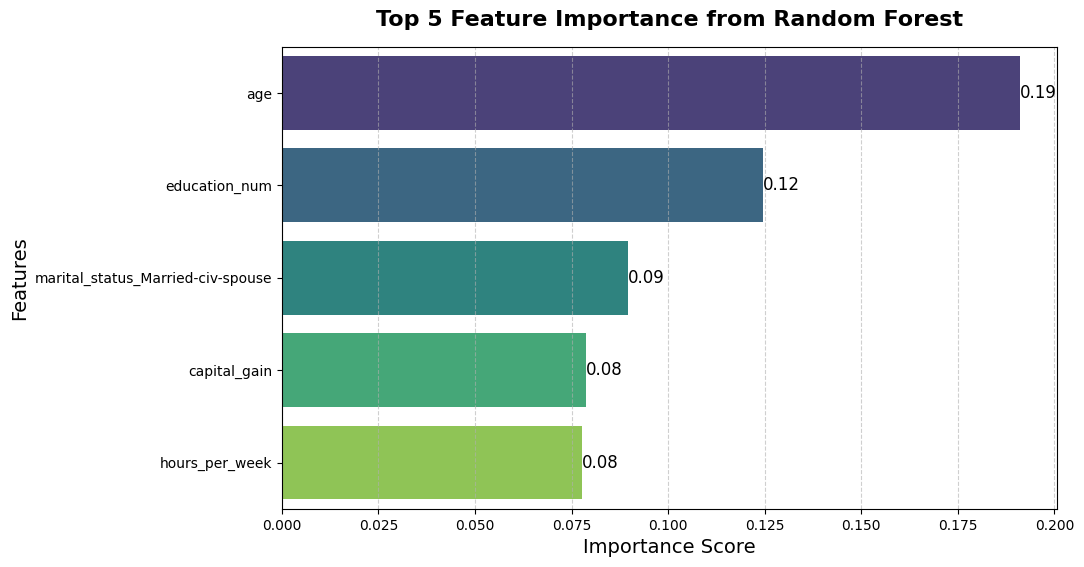

In [ ]:
# Visualization of feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'][:5], y=feature_importance['Feature'][:5], palette="viridis")

# Add titles and labels
plt.title("Top 5 Feature Importance from Random Forest", fontsize=16, fontweight="bold", pad=15)
plt.xlabel("Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)

# Display values on bars
for index, value in enumerate(feature_importance["Importance"][:5]):
    plt.text(value, index, f"{value:.2f}", va="center", fontsize=12)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Ensure that labels (y) have the correct format
y = np.array(y).ravel()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(random_state=42)
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy, training_time

# Train and evaluate for the full dataset
accuracy_whole, training_time_whole = train_and_evaluate(X_train, X_test, y_train, y_test)

# Train and evaluate for features selected via correlation analysis
X_train_corr, X_test_corr, y_train_corr, y_test_corr = train_test_split(df_train_top_features_corr_anal, y, test_size=0.2, random_state=42)
accuracy_corr, training_time_corr = train_and_evaluate(X_train_corr, X_test_corr, y_train_corr, y_test_corr)

# Train and evaluate for features selected via SelectKBest
X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest = train_test_split(df_train_top_features_k_best, y, test_size=0.2, random_state=42)
accuracy_kbest, training_time_kbest = train_and_evaluate(X_train_kbest, X_test_kbest, y_train_kbest, y_test_kbest)

# Train and evaluate for features selected via Random Forest feature importance
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df_train_top_5_features_rf, y, test_size=0.2, random_state=42)
accuracy_rf, training_time_rf = train_and_evaluate(X_train_rf, X_test_rf, y_train_rf, y_test_rf)

# Print results
print(f"Whole dataset - Accuracy: {accuracy_whole:.4f}, Training time: {training_time_whole:.4f} seconds")
print(f"Correlation analysis - Accuracy: {accuracy_corr:.4f}, Training time: {training_time_corr:.4f} seconds")
print(f"SelectKBest - Accuracy: {accuracy_kbest:.4f}, Training time: {training_time_kbest:.4f} seconds")
print(f"Random Forest feature importance - Accuracy: {accuracy_rf:.4f}, Training time: {training_time_rf:.4f} seconds")


Whole dataset - Accuracy: 0.8419, Training time: 1.9928 seconds
Correlation analysis - Accuracy: 0.8520, Training time: 0.3956 seconds
SelectKBest - Accuracy: 0.8522, Training time: 0.4011 seconds
Random Forest feature importance - Accuracy: 0.8261, Training time: 1.0435 seconds


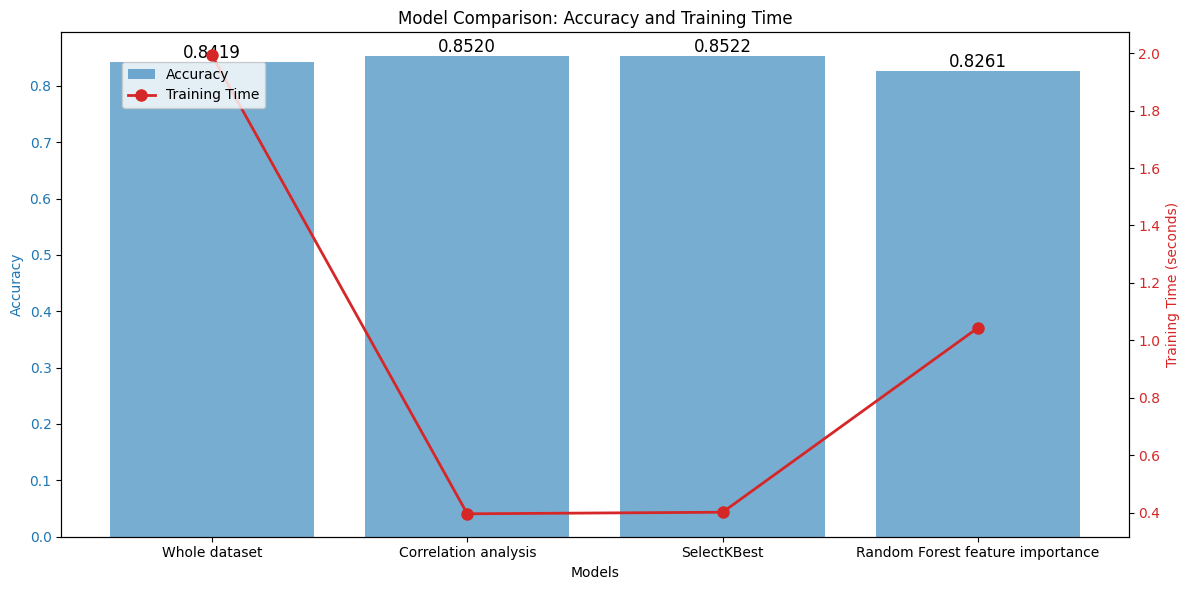

In [ ]:
import matplotlib.pyplot as plt

# Model names
models = ['Whole dataset', 'Correlation analysis', 'SelectKBest', 'Random Forest feature importance']

# Accuracies
accuracies = [accuracy_whole, accuracy_corr, accuracy_kbest, accuracy_rf]

# Training times
training_times = [training_time_whole, training_time_corr, training_time_kbest, training_time_rf]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Create plot
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy', color='tab:blue')
bars = ax1.bar(models, accuracies, color='tab:blue', alpha=0.6, label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', color='black', fontsize=12)

ax2 = ax1.twinx()
ax2.set_ylabel('Training Time (seconds)', color='tab:red')
ax2.plot(models, training_times, color='tab:red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Training Time')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Model Comparison: Accuracy and Training Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

# β

In [58]:
df_train_original.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


I will apply IQR and z scores on the original before encoding and normalization -> better practice

In [59]:
df_train_original.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,28516.000000,28516.000000,28516.000000,28516.000000,28516.000000
mean,39.261046,10.092615,1185.231204,96.733764,40.619512
std,13.711978,2.633525,7693.642033,422.964800,12.740703
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,39.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Outlier detection using IQR method
Q1 = df_train_original.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df_train_original.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = {}
for col in df_train_original.select_dtypes(include=[np.number]).columns:
	outliers_iqr[col] = df_train_original[(df_train_original[col] < (Q1[col] - 1.5 * IQR[col])) | (df_train_original[col] > (Q3[col] + 1.5 * IQR[col]))]
outliers = ((df_train_original.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (df_train_original.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).sum()
outliers

age                138
education_num      210
capital_gain      2644
capital_loss      1475
hours_per_week    6943
dtype: int64

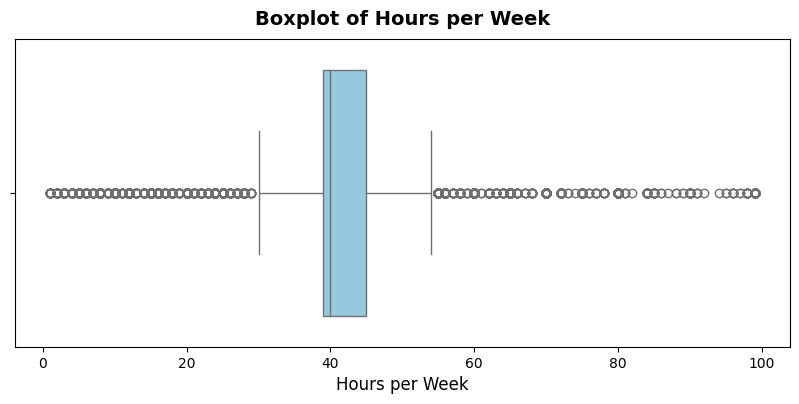

In [61]:

plt.figure(figsize=(10, 4)) 

sns.boxplot(x=df_train_original["hours_per_week"], color="skyblue")

plt.title("Boxplot of Hours per Week", fontsize=14, fontweight="bold", pad=10)
plt.xlabel("Hours per Week", fontsize=12)

plt.show()


Observations:
1) In age and education_num we see some outliers -> Probably deletion
2) In capital_gain and capital_loss the outliers are logical since the overwhelming majority answered 0
3) In hours_per_week the outliers are logical since its dispersion is quite limited

In [ ]:
from scipy.stats import zscore

# Calculate z-scores
numerical_columns = df_train_original.select_dtypes(include=['number']).columns
z_scores = df_train_original[numerical_columns].apply(zscore)

# Find outliers
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Number of outliers per column
outliers_zscore_counts = outliers_zscore.sum()

print("Outliers detected per numerical column using Z-score:")
for col, count in outliers_zscore_counts.items():
    print(f"{col}: {count} outliers")


Outliers detected per numerical column using Z-score:
age: 94 outliers
education_num: 210 outliers
capital_gain: 206 outliers
capital_loss: 1419 outliers
hours_per_week: 383 outliers


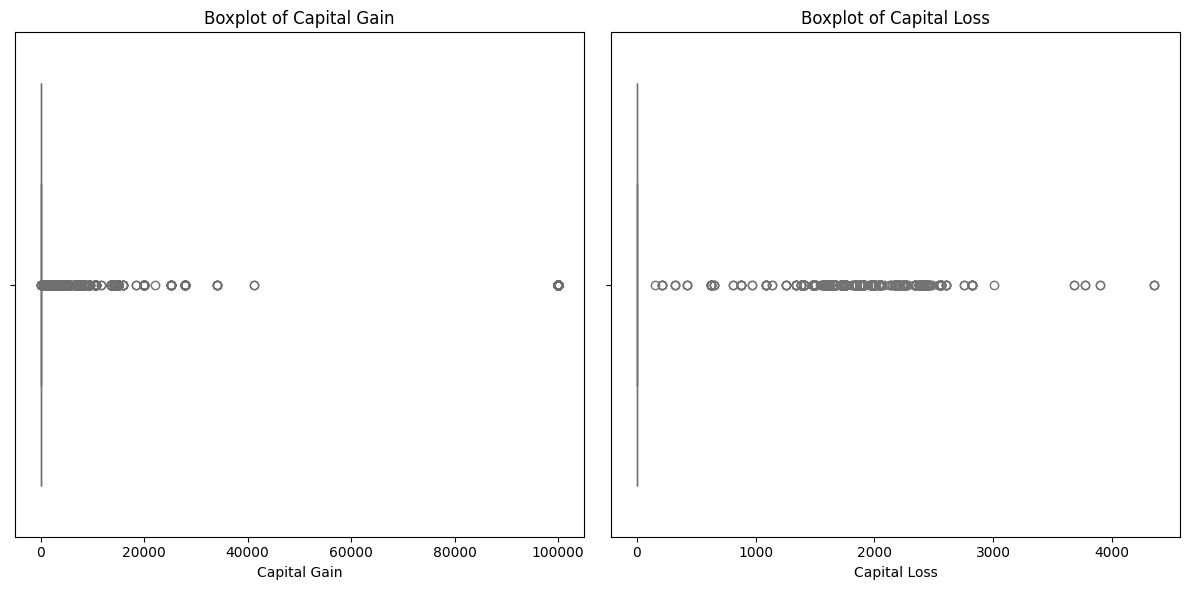

In [63]:
plt.figure(figsize=(12, 6))

# Boxplot for capital_gain
plt.subplot(1, 2, 1)
sns.boxplot(x=df_train_original['capital_gain'], color='skyblue', orient='h')
plt.title('Boxplot of Capital Gain')
plt.xlabel('Capital Gain')

# Boxplot for capital_loss
plt.subplot(1, 2, 2)
sns.boxplot(x=df_train_original['capital_loss'], color='lightgreen', orient='h')
plt.title('Boxplot of Capital Loss')
plt.xlabel('Capital Loss')

plt.tight_layout()
plt.show()

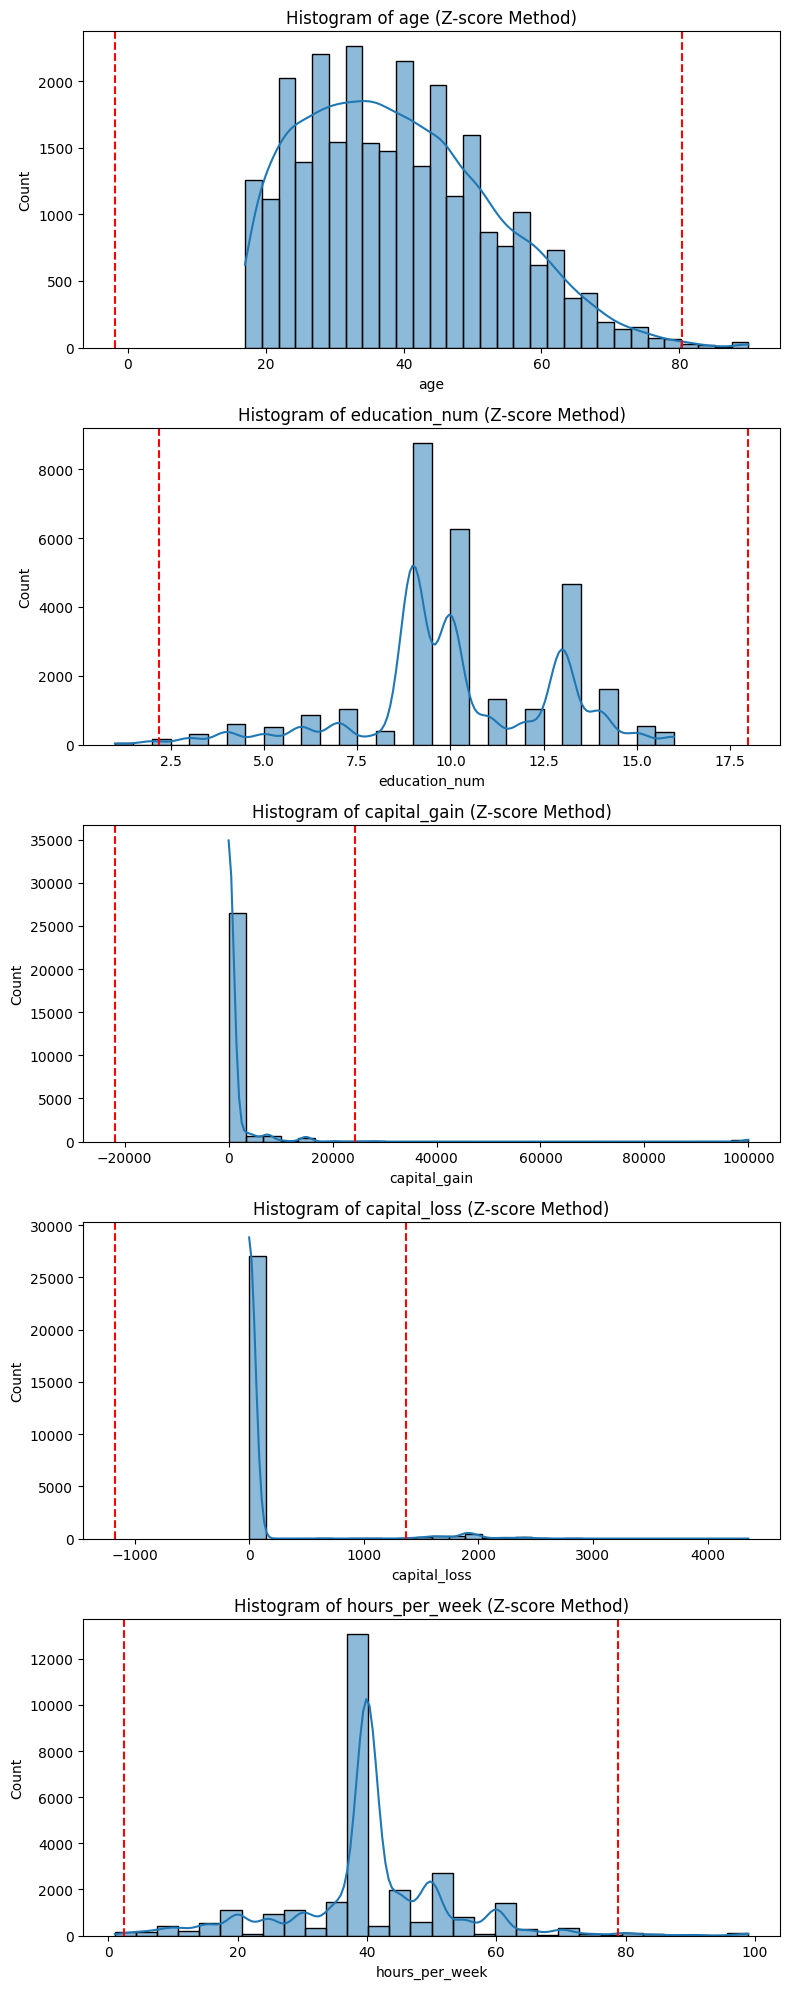

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of histograms using Z-score method
fig, axes = plt.subplots(len(df_train_original.select_dtypes(include=['number']).columns), 1, figsize=(8, 20))
for idx, col in enumerate(df_train_original.select_dtypes(include=['number']).columns):
    sns.histplot(df_train_original[col], bins=30, kde=True, ax=axes[idx])
    axes[idx].axvline(df_train_original[col].mean() + 3 * df_train_original[col].std(), color='r', linestyle='--')
    axes[idx].axvline(df_train_original[col].mean() - 3 * df_train_original[col].std(), color='r', linestyle='--')
    axes[idx].set_title(f"Histogram of {col} (Z-score Method)")
plt.tight_layout()
plt.show()


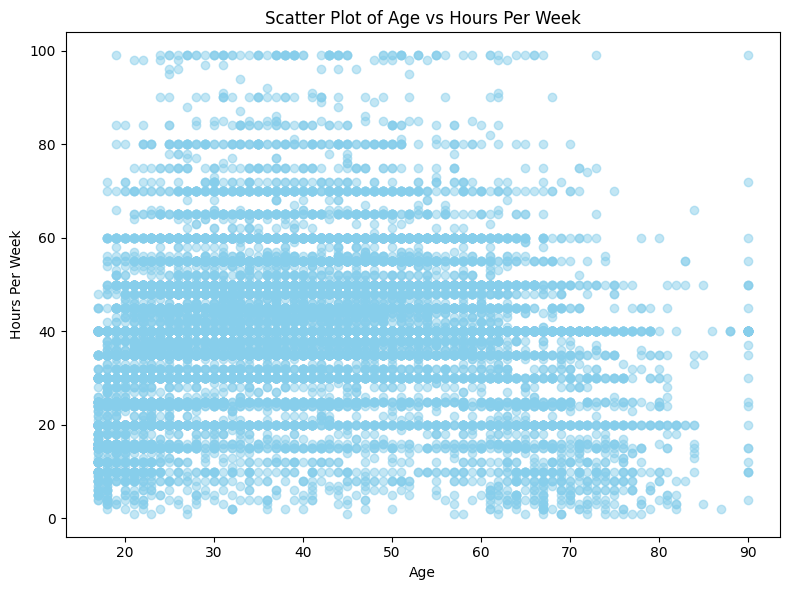

In [ ]:
# Scatter plot of the relationship between age and hours worked per week
plt.figure(figsize=(8, 6))
plt.scatter(df_train_original['age'], df_train_original['hours_per_week'], alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Age vs Hours Per Week')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.tight_layout()
plt.show()


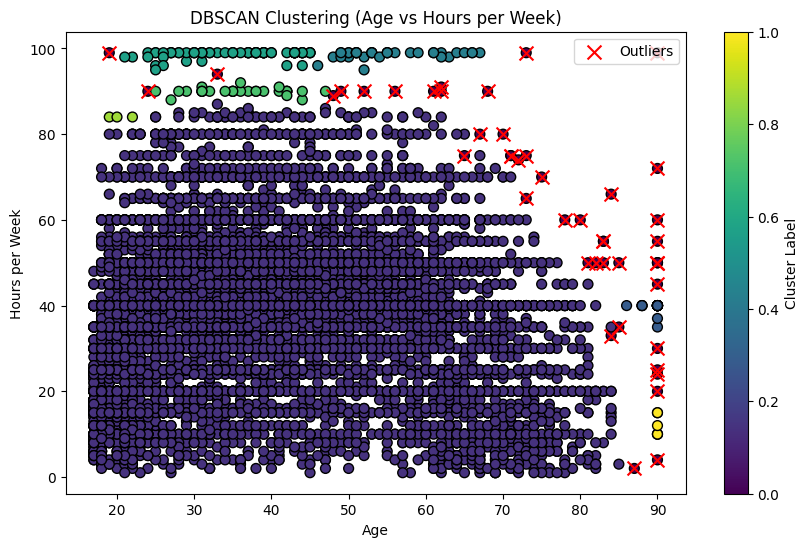

In [ ]:
from sklearn.cluster import DBSCAN

df_train_dbscan = df_train_original.copy()

# Features for DBSCAN clustering
X_clustering = df_train_original[['age', 'hours_per_week']]

# Apply DBSCAN
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(X_clustering)

# Add clusters to the original dataframe
df_train_dbscan['cluster_dbscan'] = clusters

# Detect outliers
outliers_dbscan = df_train_dbscan[df_train_dbscan['cluster_dbscan'] == -1]

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_train_dbscan['age'], df_train_dbscan['hours_per_week'], c=df_train_dbscan['cluster_dbscan'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(outliers_dbscan['age'], outliers_dbscan['hours_per_week'], color='red', marker='x', s=100, label='Outliers')
plt.title('DBSCAN Clustering (Age vs Hours per Week)')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend()
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Detect outliers based on age and education years
outliers_iqr_age = outliers_iqr['age'].index
outliers_iqr_education_num = outliers_iqr['education_num'].index

# Detect outliers based on DBSCAN
outliers_dbscan_indices = outliers_dbscan.index

# Total outliers
all_outliers = set(outliers_iqr_age).union(set(outliers_iqr_education_num)).union(set(outliers_dbscan_indices))

# Remove outliers from the original dataframe
df_train_cleaned = df_train_original.drop(index=all_outliers)

# Reset correct row numbering
df_train_cleaned.reset_index(drop=True, inplace=True)

print(f"Original dataframe shape: {df_train_original.shape}")
print(f"Cleaned dataframe shape: {df_train_cleaned.shape}")

Original dataframe shape: (28516, 13)
Cleaned dataframe shape: (28150, 13)


# 3

I will use the dataframe that has resulted after the necessary preprocessing. Without, that is, any encoding, normalization, outlier detection.

In [68]:
df_train_cleaned.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


I will present below some collected functions, which will consist of what I have done so far for easier reuse and comparison of results

In [69]:
def one_hot_encoding(df_train, df_test):
    one_hot_cols = ["workclass", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
    df_train = pd.get_dummies(df_train, columns=one_hot_cols, drop_first=True)
    df_test = pd.get_dummies(df_test, columns=one_hot_cols, drop_first=True)

def binning(df_train, df_test):
    bins = [0, 25, 50, 100]
    labels = ["young", "middle-aged", "elderly"]
    df_train["age_bins"] = pd.cut(df_train["age"], bins=bins, labels=labels)
    df_test["age_bins"] = pd.cut(df_test["age"], bins=bins, labels=labels)
    df_train["age_bins"] = df_train["age_bins"].map(age_category_mapping).astype(int)
    df_test["age_bins"] = df_test["age_bins"].map(age_category_mapping).astype(int)
    bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
    labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
    df_train['hours_per_week_bins'] = pd.cut(df_train['hours_per_week'], bins=bins, labels=labels, right=False)
    df_test['hours_per_week_bins'] = pd.cut(df_test['hours_per_week'], bins=bins, labels=labels, right=False)
    df_train["hours_per_week_bins"] = df_train["hours_per_week_bins"].map(hours_per_week_bins_mapping).astype(int)
    df_test["hours_per_week_bins"] = df_test["hours_per_week_bins"].map(hours_per_week_bins_mapping).astype(int)

def log_transform(df_train, df_test):
    df_train['capital_gain_log'] = np.log1p(df_train['capital_gain'])
    df_train['capital_loss_log'] = np.log1p(df_train['capital_loss'])
    df_test['capital_gain_log'] = np.log1p(df_test['capital_gain'])
    df_test['capital_loss_log'] = np.log1p(df_test['capital_loss'])

def normalize(df_train, df_test):
    scaler = MinMaxScaler()
    numeric_features = df_train.select_dtypes(include=['number']).columns
    df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
    df_test[numeric_features] = scaler.transform(df_test[numeric_features])

def standardize(df_train, df_test):
    scaler = StandardScaler()
    numerical_columns = df_train.select_dtypes(include=['number']).columns
    df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
    df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])


1st approach: KMeans (With or without pca. With standardization or normalization)

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, adjusted_rand_score

df_train_kmeans = df_train_cleaned.copy()
df_test_kmeans = df_test_original.copy()
target = df_train_kmeans["income"].copy()
df_train_kmeans.drop("income", axis=1, inplace=True)

In [71]:
categorical_columns = df_train_kmeans.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_train_kmeans[column] = label_encoder.fit_transform(df_train_kmeans[column])
    df_test_kmeans[column] = label_encoder.transform(df_test_kmeans[column])

binning(df_train_kmeans, df_test_kmeans)
log_transform(df_train_kmeans, df_test_kmeans)
standardize(df_train_kmeans, df_test_kmeans)

In [72]:
df_train_kmeans_cleaned = df_train_kmeans.copy()

In [73]:
df_train_kmeans.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,age_bins,hours_per_week_bins,capital_gain_log,capital_loss_log
0,0.001080,1.827462,1.119767,0.923129,-1.502275,-0.293442,0.409935,0.718252,0.127113,-0.22945,-0.052883,0.272733,-0.041014,0.094379,2.665086,-0.233909
1,0.825108,1.145048,1.119767,-0.378648,-0.808386,-0.908557,0.409935,0.718252,-0.154031,-0.22945,-2.190611,0.272733,-0.041014,-2.286231,-0.317525,-0.233909
2,-0.073831,-0.219778,-0.456463,-1.680426,-0.345794,-0.293442,0.409935,0.718252,-0.154031,-0.22945,-0.052883,0.272733,-0.041014,0.094379,-0.317525,-0.233909
3,1.049843,-0.219778,-1.244577,-0.378648,-0.345794,-0.908557,-1.873112,0.718252,-0.154031,-0.22945,-0.052883,0.272733,1.569222,0.094379,-0.317525,-0.233909
4,-0.822947,-0.219778,1.119767,-0.378648,0.579391,2.167020,-1.873112,-1.392269,-0.154031,-0.22945,-0.052883,-5.105397,-0.041014,0.094379,-0.317525,-0.233909


In [ ]:
# Create a copy of the preprocessed dataframe
df_train_kmeans_2_clusters = df_train_kmeans_cleaned.copy()

# Apply KMeans with 2 clusters
kmeans_2_clusters = KMeans(n_clusters=2, random_state=42)
df_train_kmeans_2_clusters['cluster_kmeans_2_clusters'] = kmeans_2_clusters.fit_predict(df_train_kmeans_2_clusters)

# Performance evaluation
silhouette_kmeans_2_clusters = silhouette_score(df_train_kmeans_2_clusters.drop(columns=['cluster_kmeans_2_clusters']), df_train_kmeans_2_clusters['cluster_kmeans_2_clusters'])
homogeneity_kmeans_2_clusters = homogeneity_score(target, df_train_kmeans_2_clusters['cluster_kmeans_2_clusters'])
adjusted_rand_kmeans_2_clusters = adjusted_rand_score(target, df_train_kmeans_2_clusters['cluster_kmeans_2_clusters'])

print(f"Silhouette Score (K-Means with 2 clusters): {silhouette_kmeans_2_clusters:.4f}")
print(f"Homogeneity Score (K-Means with 2 clusters): {homogeneity_kmeans_2_clusters:.4f}")
print(f"Adjusted Rand Score (K-Means with 2 clusters): {adjusted_rand_kmeans_2_clusters:.4f}")

Silhouette Score (K-Means with 2 clusters): 0.1336
Homogeneity Score (K-Means with 2 clusters): 0.1181
Adjusted Rand Score (K-Means with 2 clusters): 0.0443


In [ ]:
# Without pca
df_train_kmeans_no_pca = df_train_kmeans_cleaned.copy()
kmeans_no_pca = KMeans(n_clusters=4, random_state=42)
df_train_kmeans_no_pca['cluster_kmeans_no_pca'] = kmeans_no_pca.fit_predict(df_train_kmeans)

# Statistical metrics
silhouette_kmeans_no_pca = silhouette_score(df_train_kmeans_no_pca.drop(columns=['cluster_kmeans_no_pca']), df_train_kmeans_no_pca['cluster_kmeans_no_pca'])
homogeneity_kmeans_no_pca = homogeneity_score(target, df_train_kmeans_no_pca['cluster_kmeans_no_pca'])
adjusted_rand_kmeans_no_pca = adjusted_rand_score(target, df_train_kmeans_no_pca['cluster_kmeans_no_pca'])
print(f"Silhouette Score (K-Means without PCA): {silhouette_kmeans_no_pca:.4f}")
print(f"Homogeneity Score (K-Means without PCA): {homogeneity_kmeans_no_pca:.4f}")
print(f"Adjusted Rand Score (K-Means without PCA): {adjusted_rand_kmeans_no_pca:.4f}")

Silhouette Score (K-Means without PCA): 0.1723
Homogeneity Score (K-Means without PCA): 0.1612
Adjusted Rand Score (K-Means without PCA): 0.1017


In [ ]:
# With pca
df_train_kmeans_pca = df_train_kmeans_cleaned.copy()
pca = PCA(n_components=2)
df_train_kmeans_pca = pca.fit_transform(df_train_kmeans_pca)

In [ ]:
# Apply K-Means clustering with PCA
kmeans = KMeans(n_clusters=4, random_state=42)
df_train_kmeans['cluster_kmeans'] = kmeans.fit_predict(df_train_kmeans_pca)

# Statistical metrics
silhouette_kmeans = silhouette_score(df_train_kmeans_pca, df_train_kmeans['cluster_kmeans'])
homogeneity_kmeans = homogeneity_score(target, df_train_kmeans['cluster_kmeans'])
adjusted_rand_kmeans = adjusted_rand_score(target, df_train_kmeans['cluster_kmeans'])
print(f"Silhouette Score (K-Means with PCA): {silhouette_kmeans:.4f}")
print(f"Homogeneity Score (K-Means with PCA): {homogeneity_kmeans:.4f}")
print(f"Adjusted Rand Score (K-Means with PCA): {adjusted_rand_kmeans:.4f}")

Silhouette Score (K-Means with PCA): 0.4944
Homogeneity Score (K-Means with PCA): 0.1554
Adjusted Rand Score (K-Means with PCA): 0.0862


In [ ]:
df_train_kmeans["actual_income"] = target
cluster_eval = df_train_kmeans.groupby("cluster_kmeans")["actual_income"].value_counts(normalize=True).unstack() * 100

# Rename columns
cluster_eval.columns = ["% <=50K", "% >50K"]

print("\n**Cluster Distribution (K-Means) in Percentages**")
print(cluster_eval)


**Cluster Distribution (K-Means) in Percentages**
                  % <=50K     % >50K
cluster_kmeans                      
0               94.746327   5.253673
1               81.521030  18.478970
2               48.585231  51.414769
3               49.577504  50.422496


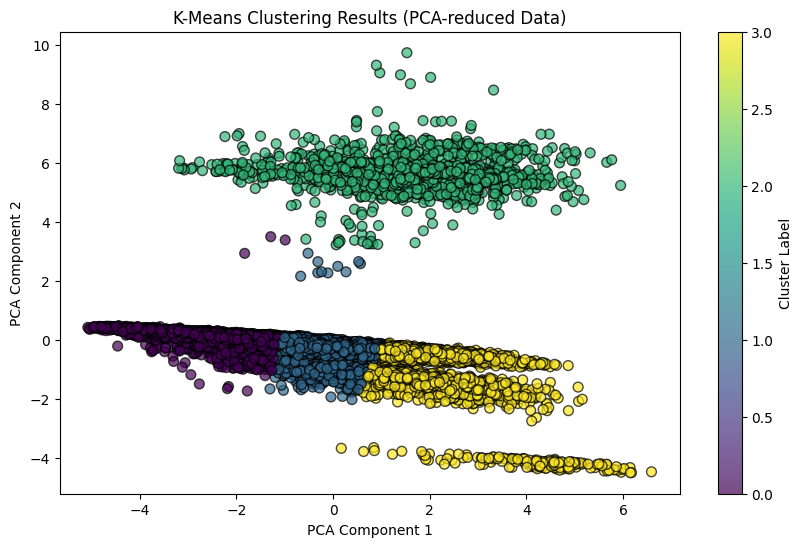

In [ ]:
# Visualization of K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_train_kmeans_pca[:, 0], df_train_kmeans_pca[:, 1], c=df_train_kmeans['cluster_kmeans'], cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title("K-Means Clustering Results (PCA-reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:
# Copy the data
df_train_kmeans_norm = df_train_cleaned.copy()
df_test_kmeans_norm = df_test_original.copy()
target_norm = df_train_kmeans_norm["income"].copy()
df_train_kmeans_norm.drop("income", axis=1, inplace=True)

In [81]:
# Encoding
categorical_columns = df_train_kmeans_norm.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_train_kmeans_norm[column] = label_encoder.fit_transform(df_train_kmeans_norm[column])
    df_test_kmeans_norm[column] = label_encoder.transform(df_test_kmeans_norm[column])
# Binning
binning(df_train_kmeans_norm, df_test_kmeans_norm)
# Log Transform
log_transform(df_train_kmeans_norm, df_test_kmeans_norm)

# Normalize the dataset
scaler = MinMaxScaler()
df_train_kmeans_norm = pd.DataFrame(scaler.fit_transform(df_train_kmeans_norm), columns=df_train_kmeans_norm.columns)

In [ ]:
# KMeans clustering
kmeans_norm = KMeans(n_clusters=6, random_state=42)
df_train_kmeans_norm['cluster_kmeans_norm'] = kmeans_norm.fit_predict(df_train_kmeans_norm)

# Statistical metrics
silhouette_kmeans_norm = silhouette_score(df_train_kmeans_norm, df_train_kmeans_norm['cluster_kmeans_norm'])
homogeneity_kmeans_norm = homogeneity_score(target_norm, df_train_kmeans_norm['cluster_kmeans_norm'])
adjusted_rand_kmeans_norm = adjusted_rand_score(target_norm, df_train_kmeans_norm['cluster_kmeans_norm'])
print(f"Silhouette Score (K-Means with PCA and Normalization): {silhouette_kmeans_norm:.4f}")
print(f"Homogeneity Score (K-Means with PCA and Normalization): {homogeneity_kmeans_norm:.4f}")
print(f"Adjusted Rand Score (K-Means with PCA and Normalization): {adjusted_rand_kmeans_norm:.4f}")

Silhouette Score (K-Means with PCA and Normalization): 0.4230
Homogeneity Score (K-Means with PCA and Normalization): 0.1684
Adjusted Rand Score (K-Means with PCA and Normalization): 0.0039


Explained variance ratio: [0.72690049 0.08637357]


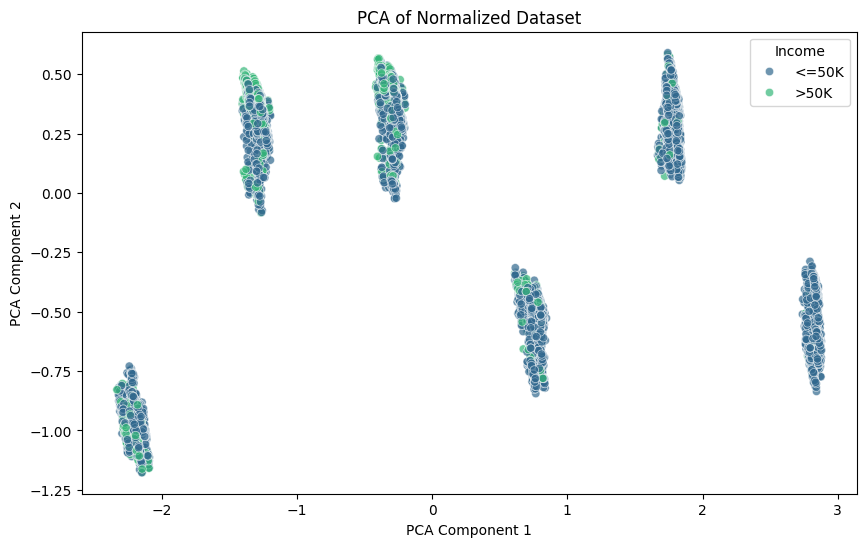

In [83]:
# Apply PCA
pca = PCA(n_components=2)
X_pca_normalized = pca.fit_transform(df_train_kmeans_norm)

# Create a DataFrame with the PCA results
df_pca_normalized = pd.DataFrame(X_pca_normalized, columns=['PCA1', 'PCA2'])
df_pca_normalized['income'] = df_train_cleaned['income'].values

# Display the explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca_normalized, x='PCA1', y='PCA2', hue='income', palette='viridis', alpha=0.7)
plt.title('PCA of Normalized Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Income')
plt.show()

Observations:
1) Without PCA the dataset is too complex for KMeans to be able to recognize patterns

2nd approach with DBSCAN

In [ ]:
# Copy the data
df_train_dbscan = df_train_cleaned.copy()
df_test_dbscan = df_test_original.copy()
target = df_train_dbscan["income"].copy()
df_train_dbscan.drop("income", axis=1, inplace=True)

C:\Users\stath\AppData\Local\Temp\ipykernel_42184\3988074748.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


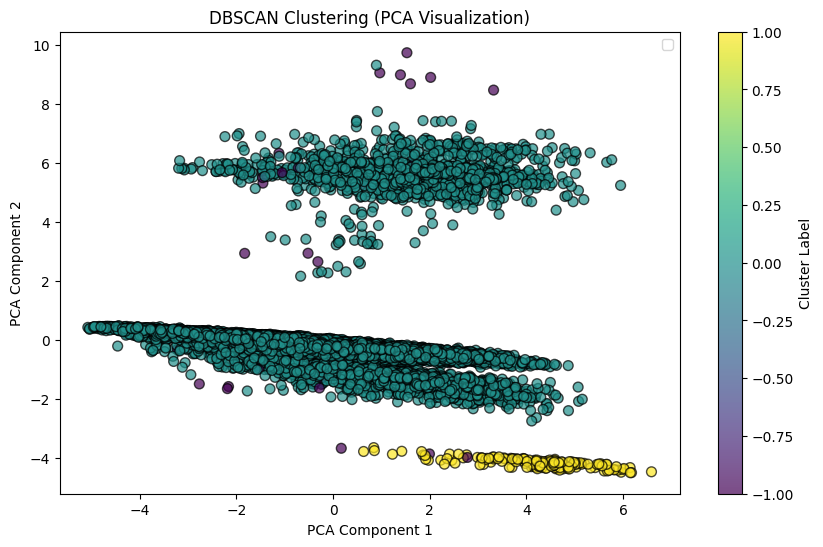

In [ ]:
# Encoding
categorical_columns = df_train_dbscan.select_dtypes(exclude=[np.number]).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_train_dbscan[column] = label_encoder.fit_transform(df_train_dbscan[column])
    df_test_dbscan[column] = label_encoder.transform(df_test_dbscan[column])

# Binning
binning(df_train_dbscan, df_test_dbscan)

# Log Transform
log_transform(df_train_dbscan, df_test_dbscan)

# Standardize the dataset
scaler = StandardScaler()
df_train_dbscan_scaled = pd.DataFrame(scaler.fit_transform(df_train_dbscan), columns=df_train_dbscan.columns)

df_train_dbscan_cleaned = df_train_dbscan_scaled.copy()

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(df_train_dbscan_scaled)

# Add clusters to the original dataframe
df_train_dbscan["cluster_dbscan"] = clusters_dbscan

# PCA for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_train_dbscan_scaled)

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_dbscan, cmap="viridis", marker="o", edgecolor="k", s=50, alpha=0.7)
plt.title("DBSCAN Clustering (PCA Visualization)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
# Statistical metrics
silhouette_dbscan = silhouette_score(df_train_dbscan_scaled, clusters_dbscan)
homogenity_dbscan = homogeneity_score(target, clusters_dbscan)
adjusted_rand_dbscan = adjusted_rand_score(target, clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_dbscan:.4f}")
print(f"Homogeneity Score (DBSCAN): {homogenity_dbscan:.4f}")
print(f"Adjusted Rand Score (DBSCAN): {adjusted_rand_dbscan:.4f}")

df_train_dbscan["actual_income"] = target
cluster_eval_dbscan = df_train_dbscan.groupby("cluster_dbscan")["actual_income"].value_counts(normalize=True).unstack() * 100

# Rename columns again
cluster_eval_dbscan.columns = ["% <=50K", "% >50K"]

print("\n**Cluster Distribution (DBSCAN) in Percentages**")
print(cluster_eval_dbscan)

Silhouette Score (DBSCAN): 0.4688
Homogeneity Score (DBSCAN): 0.0131
Adjusted Rand Score (DBSCAN): 0.0204

**Cluster Distribution (DBSCAN) in Percentages**
                  % <=50K      % >50K
cluster_dbscan                       
-1              83.333333   16.666667
 0              75.409426   24.590574
 1               0.000000  100.000000


In [ ]:
# Function for evaluating DBSCAN
def evaluate_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(df_train_dbscan_cleaned)
    
    silhouette = silhouette_score(df_train_dbscan_cleaned, clusters)
    homogeneity = homogeneity_score(target, clusters)
    adjusted_rand = adjusted_rand_score(target, clusters)
    
    return silhouette, homogeneity, adjusted_rand, clusters

# Values for eps and min_samples
eps_values = [2.0, 3.0, 4.0]
min_samples_values = [3, 5]

results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        silhouette, homogeneity, adjusted_rand, clusters = evaluate_dbscan(eps, min_samples)
        results.append((eps, min_samples, silhouette, homogeneity, adjusted_rand))

for eps, min_samples, silhouette, homogeneity, adjusted_rand in results:
    print(f"eps: {eps}, min_samples: {min_samples} -> Silhouette: {silhouette:.4f}, Homogeneity: {homogeneity:.4f}, Adjusted Rand: {adjusted_rand:.4f}")

eps: 2.0, min_samples: 3 -> Silhouette: 0.0126, Homogeneity: 0.1091, Adjusted Rand: 0.0619
eps: 2.0, min_samples: 5 -> Silhouette: 0.0809, Homogeneity: 0.1051, Adjusted Rand: 0.0605
eps: 3.0, min_samples: 3 -> Silhouette: 0.3559, Homogeneity: 0.0293, Adjusted Rand: 0.0849
eps: 3.0, min_samples: 5 -> Silhouette: 0.3849, Homogeneity: 0.0289, Adjusted Rand: 0.0847
eps: 4.0, min_samples: 3 -> Silhouette: 0.5738, Homogeneity: 0.0131, Adjusted Rand: 0.0213
eps: 4.0, min_samples: 5 -> Silhouette: 0.5399, Homogeneity: 0.0131, Adjusted Rand: 0.0211


# 4

In [88]:
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)

X = adult.data.features
y = adult.data.targets

X['income'] = y

In [89]:
X = X.replace('?', np.nan)
if X['occupation'].isnull().any():
    occupation_mode = X['occupation'].mode()[0]
    X['occupation'] = X['occupation'].fillna(occupation_mode)
if X['workclass'].isnull().any():
    X['workclass'] = X['workclass'].fillna('unknown')
X = X.dropna(subset=['native-country'])
X = X[(X['hours-per-week'] <= 120) & (X['hours-per-week'] >= 0)]  # Valid hours-per-week
X = X[(X['age'] <= 100) & (X['age'] >= 10)]  # Valid age range
X = X[X['capital-gain'] >= 0]
X = X[X['capital-loss'] >= 0]

X = X.drop('fnlwgt', axis=1)
X = X.drop('education', axis=1)
X.reset_index(drop=True, inplace=True)

X['income'] = X['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})
X['income'] = X['income'].astype(int)

C:\Users\stath\AppData\Local\Temp\ipykernel_42184\1732870052.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['income'] = X['income'].replace({'<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1})


In [90]:
X_cleaned_copy = X.copy()

In [ ]:
from sklearn.model_selection import train_test_split

X = X_cleaned_copy.drop(columns=['income'])
y = X_cleaned_copy['income']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (38388, 12), (38388,)
Testing set shape: (9597, 12), (9597,)


1st approach: Random Forest

In [ ]:
# Copies for better handling
X_train_rf = X_train.copy()
X_test_rf = X_test.copy()
y_train_rf = y_train.copy()
y_test_rf = y_test.copy()

In [93]:
X_train_rf.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
18960,64,Federal-gov,13,Divorced,Adm-clerical,Not-in-family,Black,Female,0,0,40,United-States
44957,20,Private,10,Never-married,Sales,Own-child,White,Female,0,0,40,United-States
28048,34,Private,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,43,India
10427,37,Private,13,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
1478,42,Private,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Encoding
one_hot_cols = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_rf_encoded = pd.DataFrame(ohe.fit_transform(X_train_rf[one_hot_cols]))
X_train_rf_encoded.columns = ohe.get_feature_names_out(one_hot_cols)

X_test_rf_encoded = pd.DataFrame(ohe.transform(X_test_rf[one_hot_cols]))
X_test_rf_encoded.columns = ohe.get_feature_names_out(one_hot_cols)

# Remove the original columns
X_train_rf.drop(columns=one_hot_cols, inplace=True)
X_test_rf.drop(columns=one_hot_cols, inplace=True)

# Ensure that indexes match
X_train_rf_encoded.index = X_train_rf.index
X_test_rf_encoded.index = X_test_rf.index

# Concatenation
X_train_rf = pd.concat([X_train_rf, X_train_rf_encoded], axis=1)
X_test_rf = pd.concat([X_test_rf, X_test_rf_encoded], axis=1)


In [ ]:
# binning
bins = [0, 25, 50, 100]
labels = ["young", "middle-aged", "elderly"]
X_train_rf["age-category"] = pd.cut(X_train_rf["age"], bins=bins, labels=labels)
X_test_rf["age-category"] = pd.cut(X_test_rf["age"], bins=bins, labels=labels)
X_train_rf["age-category"] = X_train_rf["age-category"].map(age_category_mapping).astype(int)
X_test_rf["age-category"] = X_test_rf["age-category"].map(age_category_mapping).astype(int)

bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
X_train_rf['hours-per-week-bins'] = pd.cut(X_train_rf['hours-per-week'], bins=bins, labels=labels, right=False)
X_test_rf['hours-per-week-bins'] = pd.cut(X_test_rf['hours-per-week'], bins=bins, labels=labels, right=False)
X_train_rf["hours-per-week-bins"] = X_train_rf["hours-per-week-bins"].map(hours_per_week_bins_mapping).astype(int)
X_test_rf["hours-per-week-bins"] = X_test_rf["hours-per-week-bins"].map(hours_per_week_bins_mapping).astype(int)

# log transformation
X_train_rf['capital-gain-log'] = np.log1p(X_train_rf['capital-gain'])
X_train_rf['capital-loss-log'] = np.log1p(X_train_rf['capital-loss'])
X_test_rf['capital-gain-log'] = np.log1p(X_test_rf['capital-gain'])
X_test_rf['capital-loss-log'] = np.log1p(X_test_rf['capital-loss'])

# scaling
scaler = StandardScaler()
numeric_features = X_train_rf.select_dtypes(include=['number']).columns
X_train_rf[numeric_features] = scaler.fit_transform(X_train_rf[numeric_features])
X_test_rf[numeric_features] = scaler.transform(X_test_rf[numeric_features])

X_train_cleaned = X_train_rf.copy()
X_test_cleaned = X_test_rf.copy()

X_train_rf.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age-category,hours-per-week-bins,capital-gain-log,capital-loss-log
18960,1.855903,1.147029,-0.14447,-0.215334,-0.031738,5.811346,-0.263765,-0.014438,-1.510864,-0.186025,...,-0.037183,-0.026034,-0.023946,0.307487,-0.039234,-0.023395,1.584073,0.108624,-0.297571,-0.219474
44957,-1.355583,-0.026776,-0.14447,-0.215334,-0.031738,-0.172077,-0.263765,-0.014438,0.661873,-0.186025,...,-0.037183,-0.026034,-0.023946,0.307487,-0.039234,-0.023395,-1.584733,0.108624,-0.297571,-0.219474
28048,-0.333746,1.538297,-0.14447,-0.215334,0.210223,-0.172077,-0.263765,-0.014438,0.661873,-0.186025,...,-0.037183,-0.026034,-0.023946,-3.252168,-0.039234,-0.023395,-0.000330,0.108624,-0.297571,-0.219474
10427,-0.114781,1.147029,-0.14447,-0.215334,-0.031738,-0.172077,-0.263765,-0.014438,0.661873,-0.186025,...,-0.037183,-0.026034,-0.023946,0.307487,-0.039234,-0.023395,-0.000330,0.108624,-0.297571,-0.219474
1478,0.250160,-0.418044,-0.14447,-0.215334,0.774797,-0.172077,-0.263765,-0.014438,0.661873,-0.186025,...,-0.037183,-0.026034,-0.023946,0.307487,-0.039234,-0.023395,-0.000330,0.919095,-0.297571,-0.219474


In [96]:
X_train_rf.shape

(38388, 93)

In [97]:
X_test_rf.shape

(9597, 93)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train decision tree classifier
best_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
best_rf_regressor.fit(X_train_rf, y_train_rf)

# Predictions on the test set
y_pred = best_rf_regressor.predict(X_test_rf)

# Statistical metrics
mae = mean_absolute_error(y_test_rf, y_pred)
mse = mean_squared_error(y_test_rf, y_pred)
r2 = r2_score(y_test_rf, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.1845
Mean Squared Error (MSE): 0.1066
R-squared (R²): 0.4275


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert predictions to binary format
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_rf, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate accuracy, recall and F1-score
class_report = classification_report(y_test_rf, y_pred_binary, target_names=['<=50K', '>50K'], digits=4)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[6675  547]
 [ 906 1469]]

Classification Report:
              precision    recall  f1-score   support

       <=50K     0.8805    0.9243    0.9018      7222
        >50K     0.7287    0.6185    0.6691      2375

    accuracy                         0.8486      9597
   macro avg     0.8046    0.7714    0.7855      9597
weighted avg     0.8429    0.8486    0.8442      9597



In [ ]:
# Train decision tree classifier with 300 trees this time
rf_regressor = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42)
rf_regressor.fit(X_train_rf, y_train_rf)

# Predictions on the test set
y_pred = rf_regressor.predict(X_test_rf)

# Statistical metrics
mae = mean_absolute_error(y_test_rf, y_pred)
mse = mean_squared_error(y_test_rf, y_pred)
r2 = r2_score(y_test_rf, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.1854
Mean Squared Error (MSE): 0.0946
R-squared (R²): 0.4920


In [ ]:
# Convert predictions to binary format
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test_rf, y_pred_binary)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate confusion matrix
class_report = classification_report(y_test_rf, y_pred_binary, target_names=['<=50K', '>50K'], digits=4)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[6848  374]
 [ 927 1448]]

Classification Report:
              precision    recall  f1-score   support

       <=50K     0.8808    0.9482    0.9132      7222
        >50K     0.7947    0.6097    0.6900      2375

    accuracy                         0.8644      9597
   macro avg     0.8378    0.7789    0.8016      9597
weighted avg     0.8595    0.8644    0.8580      9597



2nd approach: SVM

In [ ]:
from sklearn.svm import SVC

# Copies for better handling
X_train_svm = X_train_cleaned.copy()
X_test_svm = X_test_cleaned.copy()

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_svm, y_train_rf)

# Predict values
y_pred_svm = svm_classifier.predict(X_test_svm)

# Calculate statistical metrics
confusion_mat_svm = confusion_matrix(y_test_rf, y_pred_svm)
class_report_svm = classification_report(y_test_rf, y_pred_svm, target_names=['<=50K', '>50K'], digits=4)

print("Confusion Matrix (SVM):")
print(confusion_mat_svm)
print("\nClassification Report (SVM):")
print(class_report_svm)

Confusion Matrix (SVM):
[[6792  430]
 [ 980 1395]]

Classification Report (SVM):
              precision    recall  f1-score   support

       <=50K     0.8739    0.9405    0.9060      7222
        >50K     0.7644    0.5874    0.6643      2375

    accuracy                         0.8531      9597
   macro avg     0.8191    0.7639    0.7851      9597
weighted avg     0.8468    0.8531    0.8462      9597



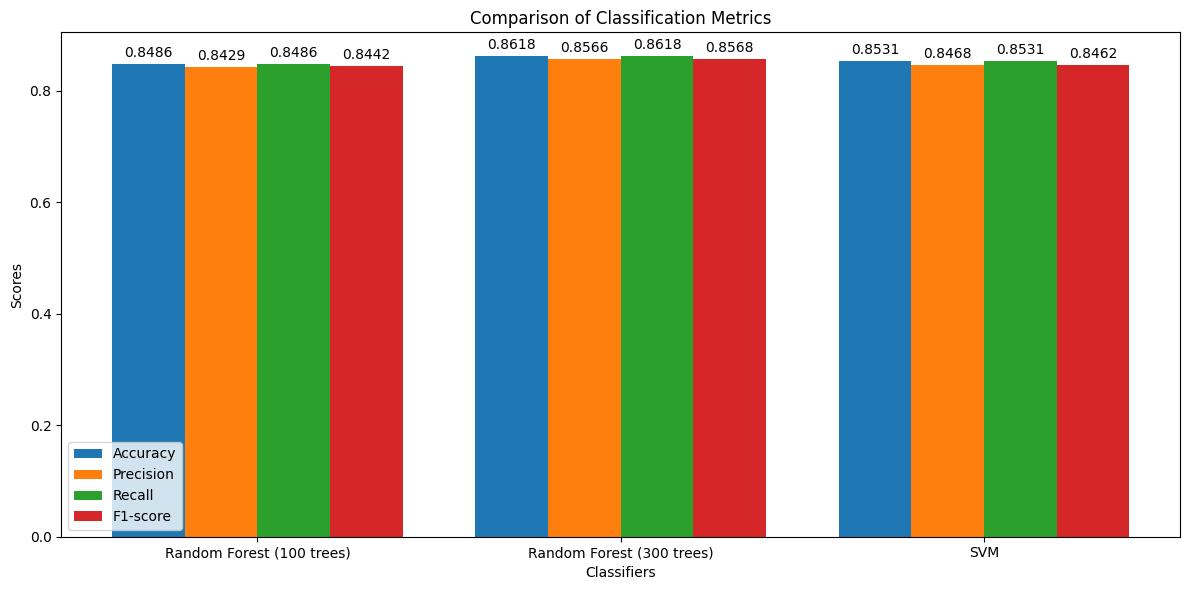

In [ ]:
# Define result values for classifiers
classifiers = ['Random Forest (100 trees)', 'Random Forest (300 trees)', 'SVM']
accuracy = [0.8486, 0.8618, 0.8531]
precision = [0.8429, 0.8566, 0.8468]
recall = [0.8486, 0.8618, 0.8531]
f1_score = [0.8442, 0.8568, 0.8462]

x = np.arange(len(classifiers))
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - width/2, precision, width, label='Precision')
rects3 = ax.bar(x + width/2, recall, width, label='Recall')
rects4 = ax.bar(x + width*1.5, f1_score, width, label='F1-score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Classification Metrics')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

# Add values to bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()


# 5

In [ ]:
X = X_cleaned_copy.drop(columns=['income'])
y = X_cleaned_copy['income']

# Split the dataset
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=1/7, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (28790, 12), (28790,)
Validation set shape: (4799, 12), (4799,)
Test set shape: (14396, 12), (14396,)


In [105]:
# One Hot
one_hot_cols = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_encoded = pd.DataFrame(ohe.fit_transform(X_train[one_hot_cols]))
X_train_encoded.columns = ohe.get_feature_names_out(one_hot_cols)

X_val_encoded = pd.DataFrame(ohe.transform(X_val[one_hot_cols]))
X_val_encoded.columns = ohe.get_feature_names_out(one_hot_cols)

X_test_encoded = pd.DataFrame(ohe.transform(X_test[one_hot_cols]))
X_test_encoded.columns = ohe.get_feature_names_out(one_hot_cols)

X_train.drop(columns=one_hot_cols, inplace=True)
X_val.drop(columns=one_hot_cols, inplace=True)
X_test.drop(columns=one_hot_cols, inplace=True)

X_train_encoded.index = X_train.index
X_val_encoded.index = X_val.index
X_test_encoded.index = X_test.index

X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_val = pd.concat([X_val, X_val_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

In [106]:
# Binning
bins = [0, 25, 50, 100]
labels = ["young", "middle-aged", "elderly"]
X_train["age-category"] = pd.cut(X_train["age"], bins=bins, labels=labels)
X_val["age-category"] = pd.cut(X_val["age"], bins=bins, labels=labels)
X_test["age-category"] = pd.cut(X_test["age"], bins=bins, labels=labels)
X_train["age-category"] = X_train["age-category"].map(age_category_mapping).astype(int)
X_val["age-category"] = X_val["age-category"].map(age_category_mapping).astype(int)
X_test["age-category"] = X_test["age-category"].map(age_category_mapping).astype(int)

bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']
X_train['hours-per-week-bins'] = pd.cut(X_train['hours-per-week'], bins=bins, labels=labels, right=False)
X_val['hours-per-week-bins'] = pd.cut(X_val['hours-per-week'], bins=bins, labels=labels, right=False)
X_test['hours-per-week-bins'] = pd.cut(X_test['hours-per-week'], bins=bins, labels=labels, right=False)
X_train["hours-per-week-bins"] = X_train["hours-per-week-bins"].map(hours_per_week_bins_mapping).astype(int)
X_val["hours-per-week-bins"] = X_val["hours-per-week-bins"].map(hours_per_week_bins_mapping).astype(int)
X_test["hours-per-week-bins"] = X_test["hours-per-week-bins"].map(hours_per_week_bins_mapping).astype(int)

# log transformation
X_train['capital-gain-log'] = np.log1p(X_train['capital-gain'])
X_val['capital-gain-log'] = np.log1p(X_val['capital-gain'])
X_test['capital-gain-log'] = np.log1p(X_test['capital-gain'])
X_train['capital-loss-log'] = np.log1p(X_train['capital-loss'])
X_val['capital-loss-log'] = np.log1p(X_val['capital-loss'])
X_test['capital-loss-log'] = np.log1p(X_test['capital-loss'])

# scaling
scaler = StandardScaler()
numeric_features = X_train.select_dtypes(include=['number']).columns
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_val[numeric_features] = scaler.transform(X_val[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

X_train.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age-category,hours-per-week-bins,capital-gain-log,capital-loss-log
10191,-0.041980,-0.021538,-0.14362,-0.215172,-0.037427,-0.171759,-0.261597,-0.015595,0.662677,-0.187919,...,-0.0373,-0.025012,-0.022832,0.308912,-0.038223,-0.024307,0.001043,0.102914,-0.294575,-0.219341
32585,-0.553020,-0.021538,-0.14362,-0.215172,-0.037427,-0.171759,-0.261597,-0.015595,0.662677,-0.187919,...,-0.0373,-0.025012,-0.022832,-3.237169,-0.038223,-0.024307,0.001043,0.102914,-0.294575,-0.219341
30157,-1.502093,-0.413496,-0.14362,-0.215172,-2.280111,-0.171759,-0.261597,-0.015595,-1.509032,-0.187919,...,-0.0373,-0.025012,-0.022832,0.308912,-0.038223,-0.024307,-1.579342,-2.313805,-0.294575,-0.219341
40178,1.783161,0.370420,-0.14362,3.316490,-0.037427,-0.171759,-0.261597,-0.015595,0.662677,-0.187919,...,-0.0373,-0.025012,-0.022832,0.308912,-0.038223,-0.024307,1.581428,0.102914,-0.294575,4.390330
3335,-0.918048,-1.197412,-0.14362,-0.215172,0.763531,-0.171759,-0.261597,-0.015595,0.662677,-0.187919,...,-0.0373,-0.025012,-0.022832,0.308912,-0.038223,-0.024307,0.001043,0.908487,-0.294575,-0.219341


c:\Users\stath\OneDrive - Εθνικό Μετσόβιο Πολυτεχνείο\Εργασία ML\kaipolyergasia\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7725 - loss: 0.4476 - val_accuracy: 0.8252 - val_loss: 0.3764
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.3482 - val_accuracy: 0.8381 - val_loss: 0.3595
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8474 - loss: 0.3412 - val_accuracy: 0.8381 - val_loss: 0.3509
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8525 - loss: 0.3304 - val_accuracy: 0.8404 - val_loss: 0.3461
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8532 - loss: 0.3268 - val_accuracy: 0.8418 - val_loss: 0.3425
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8576 - loss: 0.3128 - val_accuracy: 0.8416 - val_loss: 0.3411
Epoch 7/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8567 - loss: 0.3164 - val_accuracy: 0.8446 - val_loss: 0.3368
Epoch 8/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8550 - loss: 0.3205 - val_accuracy: 0.

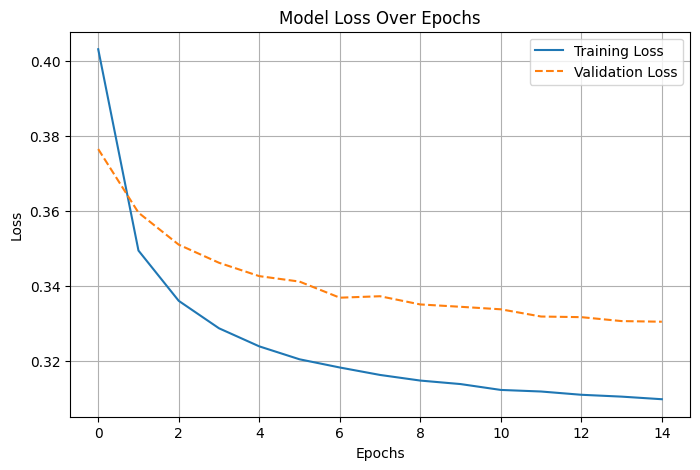

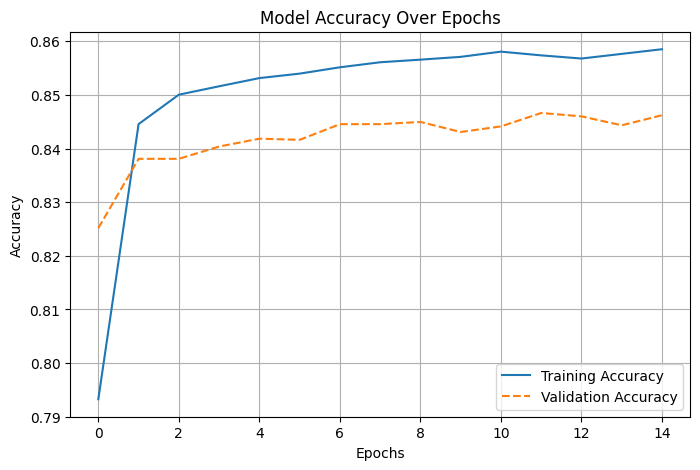

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(2, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=15, 
                    batch_size=32, 
                    verbose=1)

y_test_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Visualization of model accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/15


c:\Users\stath\OneDrive - Εθνικό Μετσόβιο Πολυτεχνείο\Εργασία ML\kaipolyergasia\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6940 - loss: 0.5853 - val_accuracy: 0.8450 - val_loss: 0.3345
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8528 - loss: 0.3184 - val_accuracy: 0.8504 - val_loss: 0.3280
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8560 - loss: 0.3140 - val_accuracy: 0.8525 - val_loss: 0.3249
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8607 - loss: 0.3028 - val_accuracy: 0.8512 - val_loss: 0.3222
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8557 - loss: 0.3081 - val_accuracy: 0.8514 - val_loss: 0.3229
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8589 - loss: 0.3007 - val_accuracy: 0.8533 - val_loss: 0.3211
Epoch 7/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8576 - loss: 0.3025 - val_accuracy: 0.8527 - val_loss: 0.3207
Epoch 8/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8595 - loss: 0.2988 - val_accuracy: 0.8529 - val_

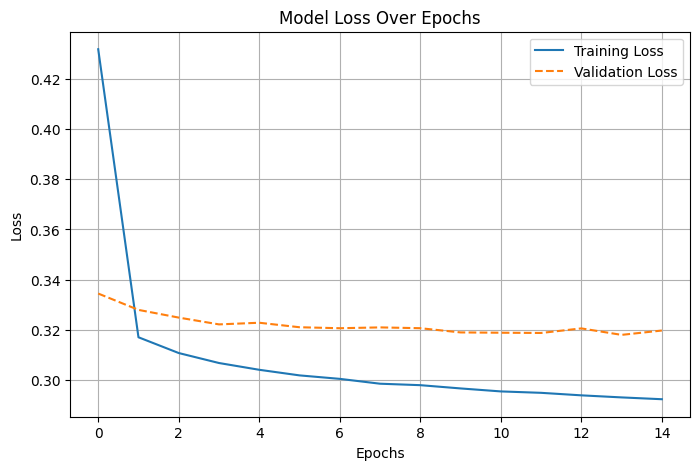

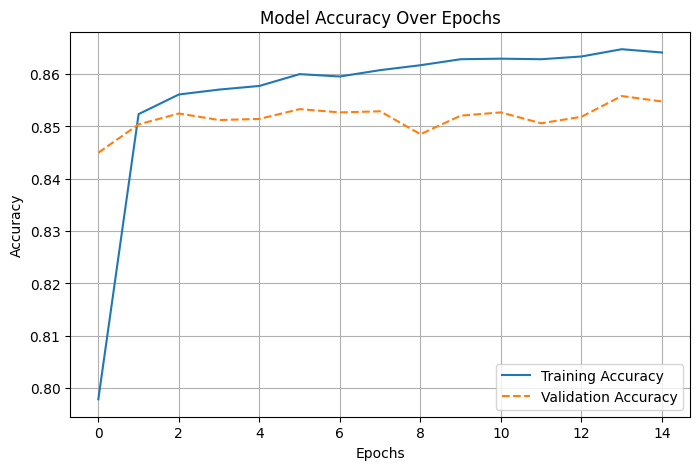

In [ ]:
# Define the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + First hidden layer
    Dense(8, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=15, 
                    batch_size=32, 
                    verbose=1)

y_test_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/15


c:\Users\stath\OneDrive - Εθνικό Μετσόβιο Πολυτεχνείο\Εργασία ML\kaipolyergasia\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8069 - loss: 0.4202 - val_accuracy: 0.8412 - val_loss: 0.3321
Epoch 2/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8501 - loss: 0.3237 - val_accuracy: 0.8462 - val_loss: 0.3256
Epoch 3/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8546 - loss: 0.3122 - val_accuracy: 0.8468 - val_loss: 0.3235
Epoch 4/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8514 - loss: 0.3099 - val_accuracy: 0.8508 - val_loss: 0.3208
Epoch 5/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.2994 - val_accuracy: 0.8516 - val_loss: 0.3181
Epoch 6/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8598 - loss: 0.3022 - val_accuracy: 0.8529 - val_loss: 0.3184
Epoch 7/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8589 - loss: 0.3012 - val_accuracy: 0.8516 - val_loss: 0.3171
Epoch 8/15
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8619 - loss: 0.2950 - val_accuracy: 0.8529 - val_

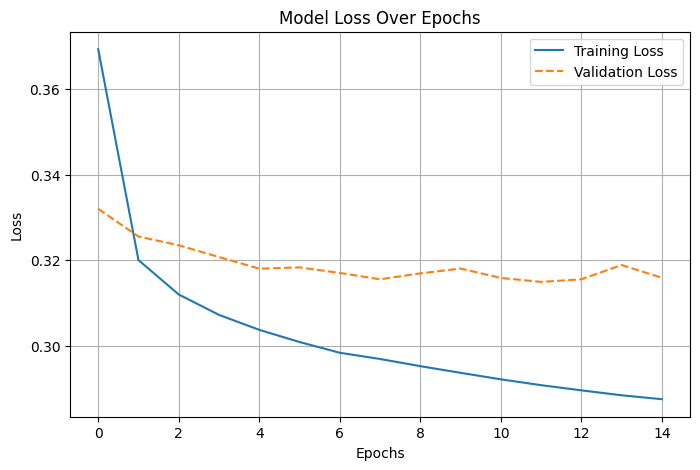

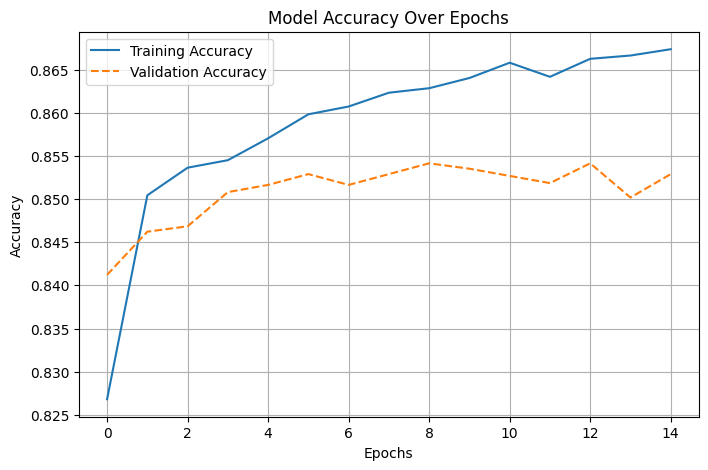

In [109]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + First hidden layer
    Dense(16, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=15, 
                    batch_size=32, 
                    verbose=1)

y_test_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()